In [16]:
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [22]:
m_mu = 105.7 #MeV
widths =[]
energies=[]
evs=[]

f = h5py.File('/sdf/home/s/seohyeon/summer25/data/muon/muon1000ev_0-1gev.h5')
trajs = f['trajectories']
segs = f['segments']

primary_mask_trajs = trajs['traj_id']==0
muon_trajs = trajs[primary_mask_trajs] # primary muon trajectories only

In [23]:
for traj in muon_trajs:
    # getting event number 
    ev_n = traj['event_id'] #these are in order: 0, 1, 2, ...
    evs.append(ev_n)
    # print('----------')
    # print(f'event: {ev_n}')

    # getting segments in that muon track only
    ev_mask = segs['event_id'] == ev_n #ev_mask is a boolean array, true if that segment is in that trajectory
    ev_segs = segs[ev_mask] #all segments in that event
    primary_mask_segs = ev_segs['traj_id'] == 0 
    muon_segs = ev_segs[primary_mask_segs] #only segments in primary muon track

    # only want to do get data if enough data points for pca
    if len(muon_segs) < 5:
         print('skipped, not enough segments in track')
         continue

    # assigning a point (midpoint) to each segment
    seg_pt_data = []
    for seg in muon_segs:
        seg_r0 = np.array([seg['x_start'], seg['y_start'], seg['z_start']])
        seg_rf = np.array([seg['x_end'], seg['y_end'], seg['z_end']])
        seg_pt = seg_r0 + 0.5 * (seg_rf - seg_r0)
        seg_pt_data.append(seg_pt)

    # pca analysis
    pca = PCA(n_components = 3)
    seg_pca = pca.fit(seg_pt_data)
    max_width = pca.explained_variance_ratio_[1]
    # below removes an outlier:
    # if max_width > 0.06:
    #     continue
    widths.append(max_width)

    # getting energy
    KE = traj['E_start'] - m_mu
    energies.append(KE)


print(len(energies))
print(len(widths))



    

skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
skipped, not enough segments in track
986
986


Text(0.5, 1.0, 'relative variance in max transverse width percentage vs. muon KE, 1000 events')

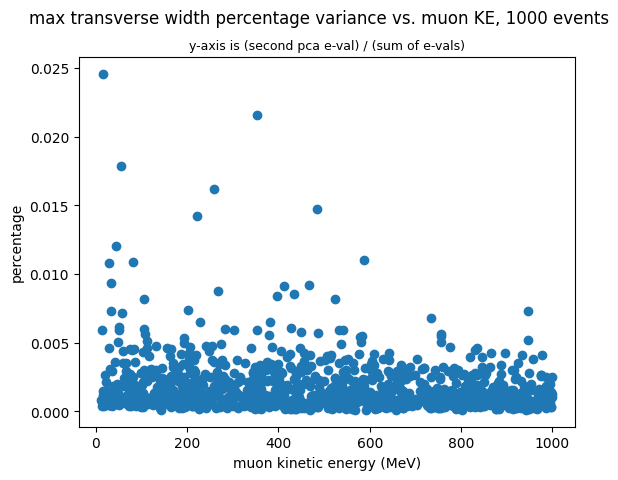

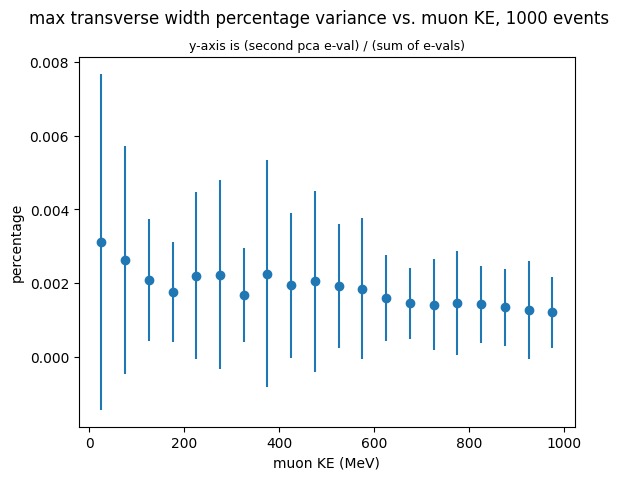

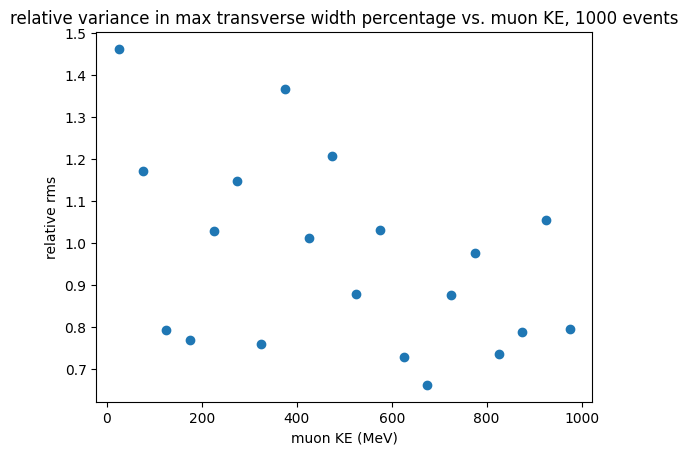

In [24]:
import importlib
import tools
importlib.reload(tools)

from tools import bin20  

total_evs = np.max(evs) + 1
# all data
plt.plot(energies, widths, 'o')
plt.xlabel('muon kinetic energy (MeV)')
plt.ylabel('percentage')
plt.suptitle(f'max transverse width percentage variance vs. muon KE, {total_evs} events')
plt.title('y-axis is (second pca e-val) / (sum of e-vals)', fontsize=9)


# profile
bin_midpts, avgs, rms, relative_rms = bin20(energies, widths)
plt.figure()
plt.errorbar(bin_midpts, avgs, rms, fmt='o')
plt.xlabel('muon KE (MeV)')
plt.ylabel('percentage')
plt.suptitle(f'max transverse width percentage variance vs. muon KE, {total_evs} events')
plt.title('y-axis is (second pca e-val) / (sum of e-vals)', fontsize=9)

# relative rms
plt.figure()
plt.plot(bin_midpts, relative_rms, 'o')
plt.xlabel('muon KE (MeV)')
plt.ylabel('relative rms')
plt.title(f'relative variance in max transverse width percentage vs. muon KE, {total_evs} events')




